# Exercises PHS

In [16]:
#Imports
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
import sympy as sp
from IPython.display import display, Latex

%load_ext autoreload
%autoreload 2
from phs_simulator import QuadraticPhsSolverIndependantMatrices, QuadraticPhsSolver, PHSQuadratiser
import utility_Phs as util

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## $\color{red}{\text{Introduction}}$

This documents presents an implementation of a method used to solve the dynamic of systems expressed under a Port-Hamiltonian Diferential Formulation and with a quadratic hamiltonian. This allows to use an explicit method to solve the system while conserving power balance. 

It is based on methods, examples and exercices prensented in the lecture notes "Elementary tools on Port-Hamiltonian Systems with applications to audio/acoustics" written by Thomas Hélie for the 2nd Spring School on Theory and Applications of Port-Hamiltonian Systems, Fauenchiemsee, 20-25 March 2022.


## <span style="color:red">Example of the booklet : mechanical oscillator</span>

In this part, we first run simples simulations on the mechanical oscillator presented as an example in section 2 of the booklet.

After derivation done in the booklet, the system can be expressed in its differential formulation with : 
$$
f_D = 
\begin{bmatrix} 
\dot{x}_1 = F_m\\
\dot{x}_2 = V_{sp}\\
y = V_{ext}
\end{bmatrix}
$$

$$
e_D = 
\begin{bmatrix} 
H_1'(x_1) = V_m = \frac{\pi}{m}\\
H_2'(x_2) = F_{sp} = k\xi\\
u = -F_{ext}
\end{bmatrix}
$$

$$
J = -J^T =  
\begin{bmatrix} 
0 & -1 & -1 \\
1 & 0 & 0 \\
1 & 0 & 0 \\
\end{bmatrix}
$$

$$
R = R^T =  
\begin{bmatrix} 
r & 0 & 0 \\
0 & 0 & 0 \\
0 & 0 & 0 \\
\end{bmatrix}
$$

using the momentum $\pi$ of the mass and the spring elongation $\xi$ as state variables so that :
$x = \begin{bmatrix} 
\pi \\
\xi \\
\end{bmatrix}$
The hamiltonian is equal to :
$$
H(x) = 0.5 x^T 
\begin{bmatrix} 
\frac{1}{m} & 0 \\
0 & k  \\
\end{bmatrix}
x = 0.5 x^T L x
$$

In [17]:
#system parameters
r = 5 # kg.s^-1
m = 1 # kg
k = 2000 # N.m^-1
f0 = np.sqrt(k/m) / (2*np.pi) # Hz
T0 = 1/f0 # s
print(f'Theoretical f0 : {f0} Hz, theoretical T0 : {T0} s')

#Matrices of the system
J = np.array([[0, -1, -1],
            [1, 0, 0],
            [1, 0, 0]])
R = np.array([[r, 0, 0],
            [0, 0, 0],
            [0, 0, 0]])
L = np.array([[1/m, 0],
            [0, k]])

#simulation parameters
duration = 3.2
sr = 500

def u_control(t):
    return 0 * np.ones_like(t)[:,None,None]

init_state = np.array([10,0])



Theoretical f0 : 7.117625434171771 Hz, theoretical T0 : 0.14049629462081453 s


In [18]:
#Building simulator and running simulation
simulator = QuadraticPhsSolverIndependantMatrices(J,R,L)

results = simulator.simulate(u_control,duration,sr,init_state)

Mean error on power balance = 2.6580581555070315e-16


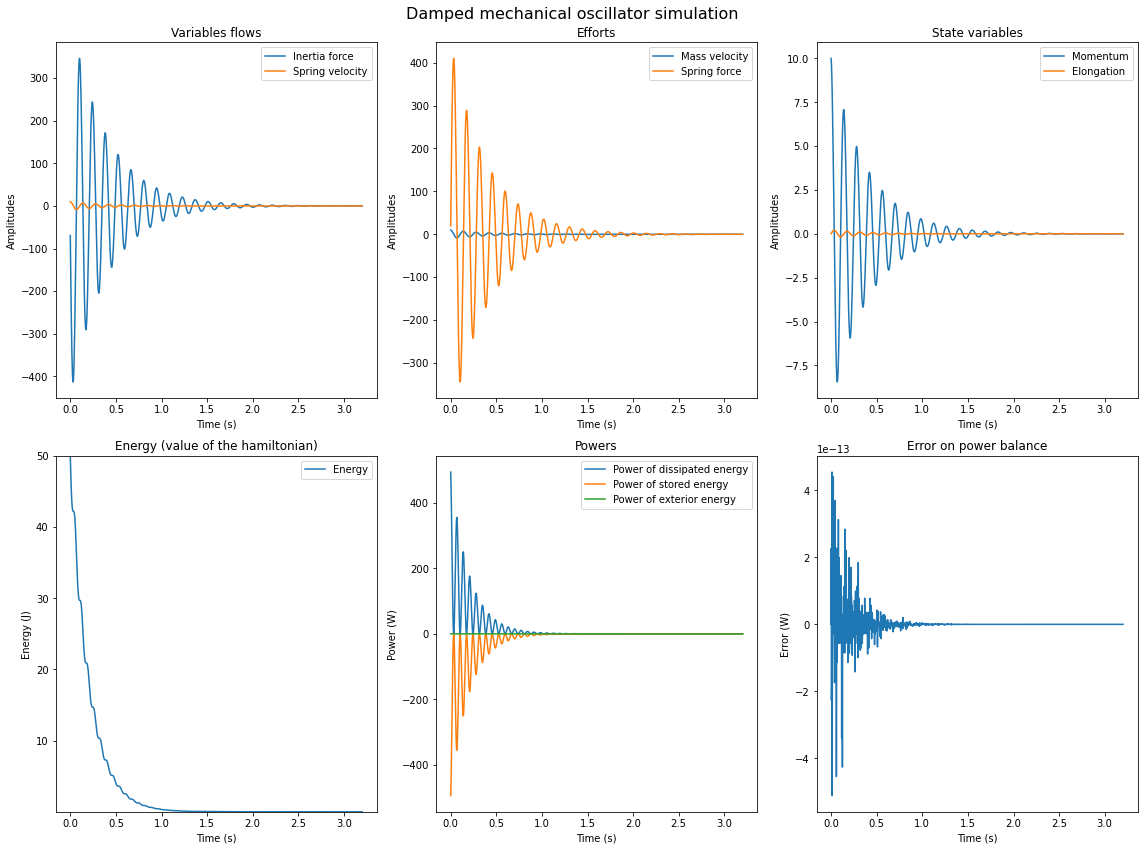

In [19]:
#Plot results
state_labels = ['Momentum','Elongation']
flow_labels = ['Inertia force','Spring velocity']
efforts_labels = ['Mass velocity','Spring force']

fig = util.plot_results(results,'Damped mechanical oscillator simulation',efforts_labels,flow_labels,state_labels)

## <span style="color:red">Exercise 1 (linear circuit) : formulations and power-balanced simulation</span>

In this exercise, we study the circuit presented below.

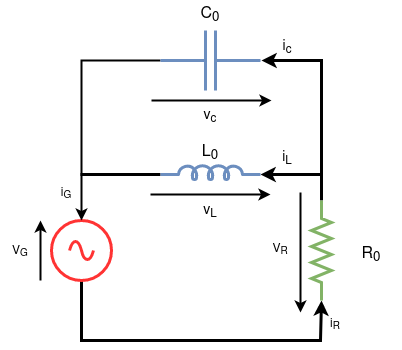

In [20]:
Image(filename='images/exercise1.png')

Efforts laws are given as : $q = C v_C$ and $\phi = Li_L$ with $q$ the capacitor charge and $\phi$ the magnetic flux of the coil. 



### Question 1 : Differential Algebraic formulation



(a) : As suggested, we choose : 
$$ 
x = \begin{bmatrix} 
q \\
\phi \\
\end{bmatrix},
w = v_R,
u = v_G 
$$
We then have : 
$$ 
H(x) = \frac{1}{2}(\frac{q^2}{C}+\frac{\phi^2}{L}),
z(w) = \frac{v_R}{R},
y = i_G 
$$



(b) : 
$$ 
f = \begin{bmatrix} 
\dot{q} = i_c \\
\dot{\phi} = v_L \\
w = v_R\\
y = i_G
\end{bmatrix},
e = \begin{bmatrix} 
\frac{q}{C} = v_C \\
\frac{\phi}{L} = i_L \\
\frac{v_R}{R} = i_R\\
u = v_G
\end{bmatrix}
$$


(c): Writing Kirchhoff laws gives : 
$$v_G+v_C+v_R=0$$
$$v_C = v_L$$
$$i_R = i_G = i_L+i_C$$

We can then deduce the interconnection matrix S : 
$$
S = -S^T =  
\begin{bmatrix} 
0 & -1 & 1 & 0 \\
1 & 0 & 0 & 0 \\
-1 & 0 & 0 & -1 \\
0 & 0 & 1 & 0
\end{bmatrix}
$$



### Question 2 : Differential formulation

(a) : We have $z(w) = \frac{w}{R}$ so that $\Gamma(w) = \frac{1}{R}$. $\Gamma + \Gamma^T = \frac{2}{R}$, $S_{ww} = 0$ and $P = [-S_{xw}^T,S_{wu}]=[-1, 0, -1]$ is independant of $w$. It's then possible to write the system under a differential form.

(b) : In our case : 
$$
P =  
\begin{bmatrix} 
-1 & 0 & -1 \\
\end{bmatrix},
\Gamma _D=\frac{1}{R}
$$
We can then deduce : 
$$
J_D =  
\begin{bmatrix} 
0 & -1 & 0 \\
1 & 0 & 0 \\
0 & 0 & 0  
\end{bmatrix},
R_D = \frac{1}{R}
\begin{bmatrix} 
1 & 0 & 1 \\
0 & 0 & 0 \\
1 & 0 & 1  
\end{bmatrix}
$$



(c) : The differential formulation writes : 

$$ 
\begin{bmatrix} 
\dot{q} = i_c \\
\dot{\phi} = v_L \\
y = i_G
\end{bmatrix} = 
(  
\begin{bmatrix} 
0 & -1 & 0 \\
1 & 0 & 0 \\
0 & 0 & 0  
\end{bmatrix}-
\frac{1}{R}
\begin{bmatrix} 
1 & 0 & 1 \\
0 & 0 & 0 \\
1 & 0 & 1  
\end{bmatrix}
)
\begin{bmatrix} 
\frac{q}{C} = v_C \\
\frac{\phi}{L} = i_L \\
u = v_G
\end{bmatrix}
$$


### Question 3 : Discrete gradient and numerical method

(a) : Deriving the discrete gradient gives : 
$$ 
\Delta _{||}H(x,\delta x) = 
\begin{bmatrix} 
\frac{H(q+\delta q)-H(q)}{\delta q} \\
\frac{H(\phi+\delta \phi)-H(\phi)}{\delta \phi}
\end{bmatrix} =
\begin{bmatrix} 
\frac{(q+\delta q)^2-q^2}{2c \delta q} \\
\frac{(\phi+\delta \phi)^2-q^2}{2L \delta \phi}
\end{bmatrix} = 
\begin{bmatrix} 
\frac{2q+\delta q}{2c} \\
\frac{2 \phi+\delta \phi}{2L}
\end{bmatrix}
$$



(b) : We indeed find that the discrete gradient is equal to the real gradient computed in $x+\frac{\delta x}{2}$.

### Question 4 : Simulation

We use the class QuadraticPhsSolverIndependantMatrices which is in the file phs_simulator.py to simulate the behavior of the circuit.

### Question 5 : Numerical experiments

(a) & (b): tests in the convenient situation where $T_0>2\delta t$. Simulations in free regime with non-zero initial condition and response to a step in control voltage.

In [45]:
#Simulation parameters
duration = 4
sr = 44100

def vcontrol(t):
    return np.zeros_like(t)[:,None,None]

L0 = 0.01
C0 = 1
T0 = 2*np.pi*np.sqrt(L0*C0)
f0 = 1/T0
print(f'Theoretical f0 : {f0} Hz, theoretical T0 : {T0} s')
R0 = 1

J = np.array([[0, -1, 0],
                [1, 0, 0],
                [0, 0, 0]])
R = 1 / R0 * np.array([[1, 0, 1],
                        [0, 0, 0],
                        [1, 0, 1]]) 
L = np.array([[1/C0, 0],
            [0, 1/L0]])

init_state = np.array([1,0])


Theoretical f0 : 1.5915494309189535 Hz, theoretical T0 : 0.6283185307179586 s


In [46]:
#Simulation
simulator = QuadraticPhsSolverIndependantMatrices(J,R,L)
results_sim1 = simulator.simulate(vcontrol, duration, sr, init_state)


Mean error on power balance = 1.0071260554195029e-17


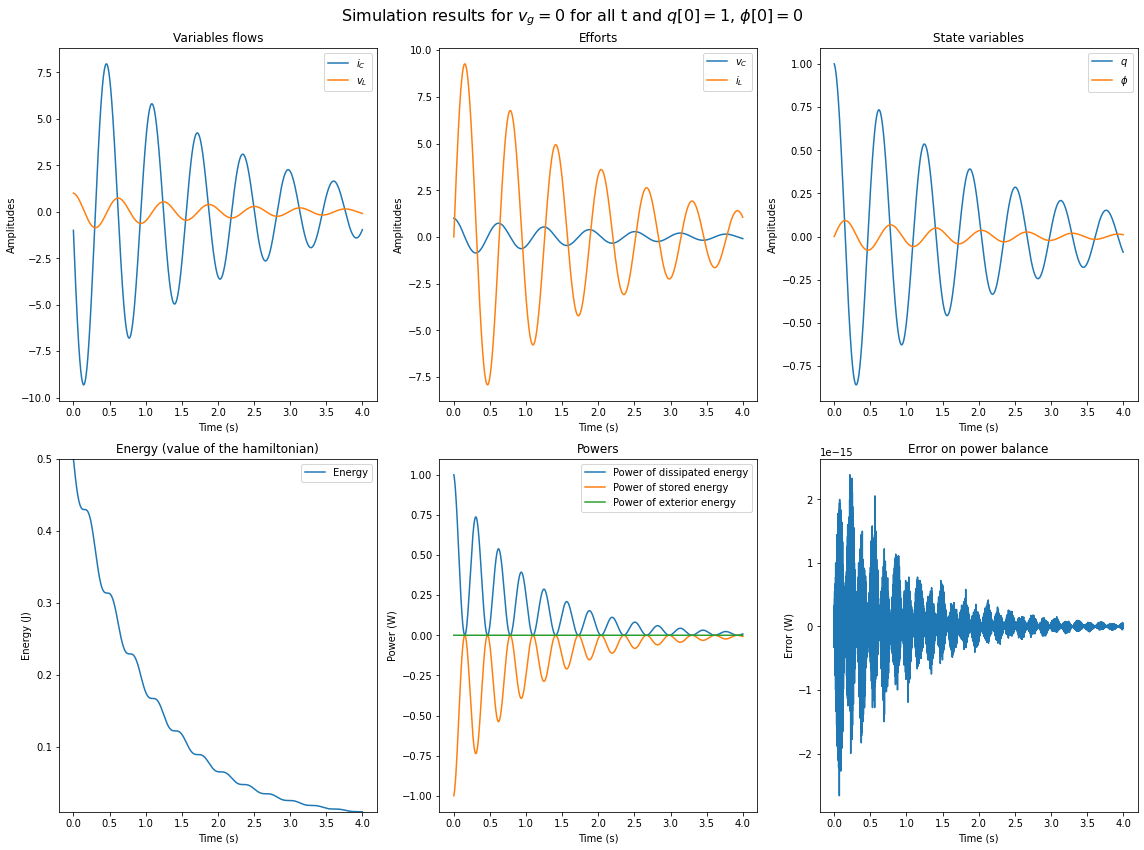

In [47]:
#Plot simulation results
plot_title = "Simulation results for $v_g = 0$ for all t and $q[0] = 1$, $\phi [0] = 0$"
state_labels = ["$q$","$\phi$"]
flow_labels = ["$i_C$","$v_L$"]
efforts_labels = ['$v_C$','$i_L$']

fig = util.plot_results(results_sim1, plot_title, efforts_labels, flow_labels, state_labels)

In [50]:
#Second simulation with a step impulse as control voltage
def vcontrol(t):
    return np.ones_like(t)[:,None,None]

init_state = np.array([0,0])

results_sim2 = simulator.simulate(vcontrol, duration, sr, init_state)

Mean error on power balance = -1.7182023000151233e-19


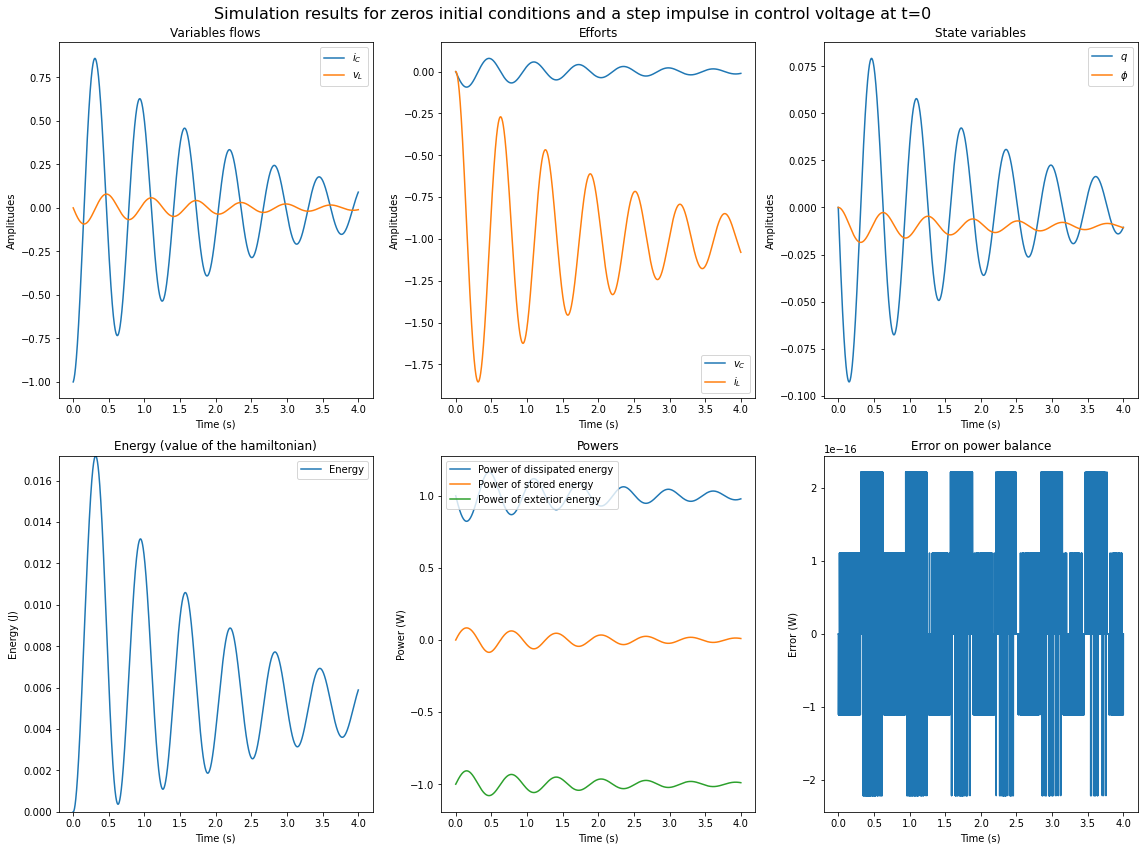

In [51]:
#Plot simulation results
plot_title = "Simulation results for zeros initial conditions and a step impulse in control voltage at t=0"

fig = util.plot_results(results_sim2, plot_title, efforts_labels, flow_labels, state_labels)

We can observe that the error stays below 1e-15, that is numerical precision error.

(c) Testing robustness of the numerical passivity for any $\delta t>0$. We keep the same configuration as before but we reduce the sempla rate to 1 Hz.

In [52]:
#Third simulation with a reduced sample rate
sr = 1

results_sim3 = simulator.simulate(vcontrol, duration, sr, init_state)

Mean error on power balance = 2.7755575615628914e-17


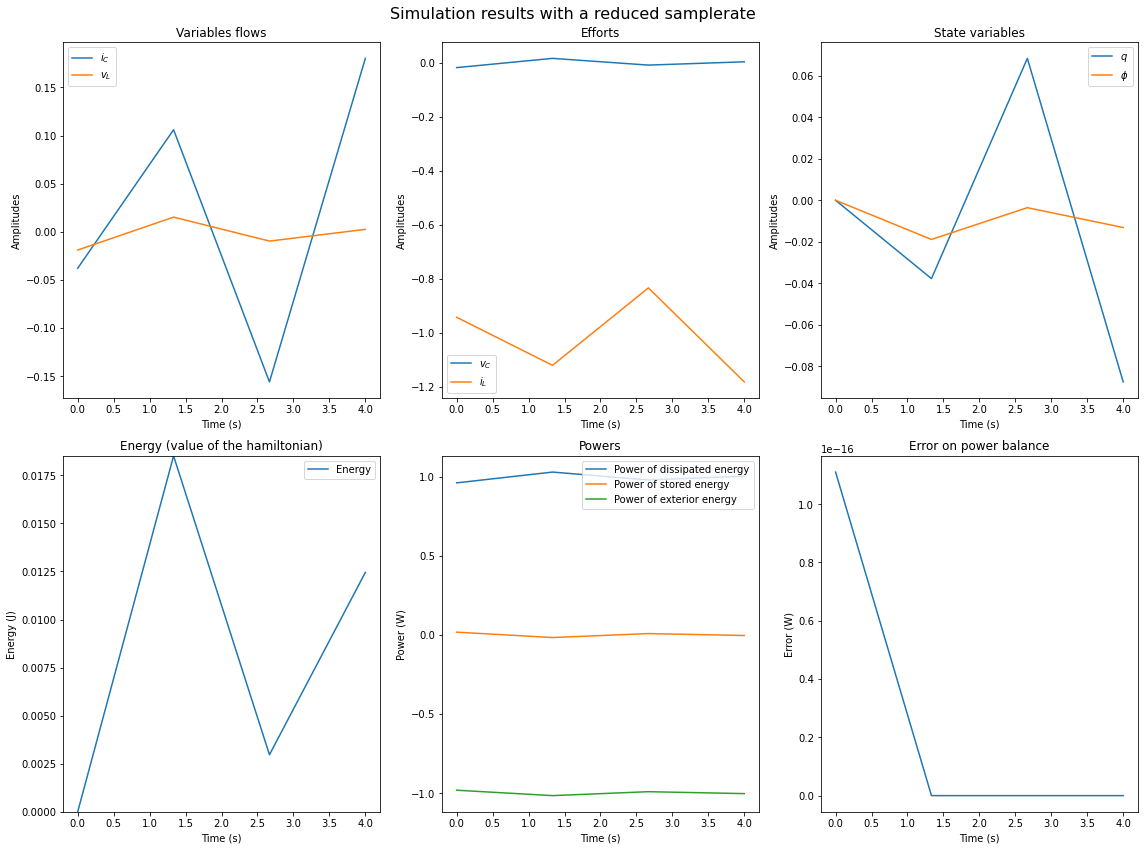

In [53]:
#Plot simulation results
plot_title = "Simulation results with a reduced samplerate"

fig = util.plot_results(results_sim3, plot_title, efforts_labels, flow_labels, state_labels)

Even if shannon's criterion is not satisfied, passivity is still verified.

## <span style="color:red">Exercise 2 (nonlinear circuit): quadratisation method</span>

### Question 6 : PHS

(a) : Flows and interconnection matrix stay the same. The hamiltonian being separable, only the effort associated with the coil changes : 
$$
H(\phi) = E_0 ln(cosh(\frac{\phi}{\phi_0}))
\longrightarrow
\nabla H(\phi) = \frac{E_0}{\phi_0} tanh(\frac{\phi}{\phi_0})
$$

(b) : Around 0, we can write : 
$$
\nabla H(\phi) = E_0 \frac{\phi}{\phi_0^2} + o(\phi^2)
$$
The equivalent inductance would then be $L_0 = \frac{\phi_0^2}{E_0}$

### Question 7 : Quadratised PHS

We follow the procedure written n §4.4 (p.18).

1 : Hypotheses 49 being satisfied in our case, we can use 
$$
Q(x) =
\begin{bmatrix} 
q_1(x_1) \\
q_2(x_2) \\
\end{bmatrix}
$$
with $q_n(x_n) = sign(x_n)\sqrt{2H_n(x_n)}$, which gives : 
$$
q_1(q) = \frac{q}{\sqrt(C_0)},
q_2(\phi) = sign(\phi)\sqrt{2E_0ln(cosh(\frac{\phi}{\phi_0}))}

2: We have : $x_1(q_1) = \frac{q_1}{\sqrt{C_0}}$ and
$x_2(q_2) = sign(q_2) \phi_0 arccosh(e^{\frac{q_2^2}{2E_0}})$ 

3 : We first build the jacobian matrix : 
$$
\Im_{qx}(x) = \nabla ^T_xQ(x) = 
\begin{bmatrix} 
\frac{1}{\sqrt{c_0}} & 0\\
0 & sign(\phi)\frac{E_0}{\phi_0}\frac{tanh(\frac{\phi}{\phi_0})}{\sqrt{2E_0ln(cosh(\frac{\phi}{\phi_0}))}}\\
\end{bmatrix}
$$
then, the matrix $\Im_q(q)$:

$$
\Im_q(q)= 
\begin{bmatrix} 
\Im_{qx}\circ X(q)& 0\\
0 & I_{dim(u)}\\
\end{bmatrix}
=
\begin{bmatrix} 
\frac{1}{\sqrt{c_0}}& 0 & 0\\
0 & sign(q_2)\frac{E_0}{\phi_0} \frac{\sqrt{(1-e^{-\frac{q_2^2}{E_0}})}}{q_2} & 0\\
0 & 0 & 1
\end{bmatrix}
$$

To compute $M_q$, $J_q$ and $R_q$  we first recall:
$$
J =  
\begin{bmatrix} 
0 & -1 & 0 \\
1 & 0 & 0 \\
0 & 0 & 0  
\end{bmatrix},
R = \frac{1}{R}
\begin{bmatrix} 
1 & 0 & 1 \\
0 & 0 & 0 \\
1 & 0 & 1  
\end{bmatrix}
$$
We then have :
$$
J_q (q) = 
\Im_q(q)J\Im_q(q)^T=
\begin{bmatrix}
0 & -sign(q_2)\sqrt{\frac{1}{C_0}}\frac{E_0}{\phi_0} \frac{\sqrt{(1-e^{-\frac{q_2^2}{E_0}})}}{q_2} & 0 \\
sign(q_2)\sqrt{\frac{1}{C_0}}\frac{E_0}{\phi_0} \frac{\sqrt{(1-e^{-\frac{q_2^2}{E_0}})}}{q_2} & 0 & 0 \\
0 & 0 & 0  
\end{bmatrix}
$$
$$
R_q (q) = 
\Im_q(q)R\Im_q(q)^T=\frac{1}{R}
\begin{bmatrix}
\frac{1}{C_0} & 0 & \frac{1}{\sqrt{C_0}} \\
0 & 0 & 0 \\
\frac{1}{\sqrt{C_0}}& 0 & 1 
\end{bmatrix}
$$
and
$$
M_q (q) = J_q (q) - R_q (q)
$$

Matrices A, B and $\Delta$ are as described in §4.2 (p.16) and are computed in the class QuadracticPhsSolver aswell as updating equation.

Thanks to symbolic computation tools such as sympy, it is possible to leave some of the computations above to the computer. The purpose of the PHSQuadratiser class is to compute automatically the change of variable needed to quadratise the system and the different matrices associated. At initialization, all matrices are computed $\textbf{but}$ matrices $J_q(q), R_q(q) \ \text{and} \ M_q(q)$ are left as expression of $x = X(q)$ as the expression of $X(q)$ is not known at this time. These matrices are called $J_x(x), R_x(x) \  \text{and}\  M_x(x)$.

After initialization, the user can retrieve the expression of $Q:x\rightarrow q$ and build or derive the expression of $X = Q^{-1}$. If an expression is derived, the class function "computeJRMq" can then be used to apply matrices $ J_x(x), R_x(x) \  \text{and}\  M_x(x)$ to $x = X(q)$ and obtain matrices $J_q(q), R_q(q) \ \text{and} \ M_q(q)$.

In [54]:
#Initilization of the class
#Note : it's important to specify caracteristics (real, positive) of the symbols 
#to sympy when you declare them to allow for better simplification of the expressions

#State variables
q, phi = sp.symbols('q phi', real = True)
state = np.array([q, phi], dtype = object)

#Component parameters
E0, phi0, C0, R0 = sp.symbols('E_0 phi_0 C_0 R_0', real = True, positive = True)

#Hamiltonian value
H = (q**2/(2*C0) + E0*sp.log(sp.cosh(phi/phi0)))

#Initialization of the class
phsquad = PHSQuadratiser(J,R,state,H)

#Displaying some computations made at initialization
fig = util.display_quadratization_init(phsquad)

<IPython.core.display.Latex object>

q_+/sqrt(C_0)

sqrt(2)*sqrt(E_0)*sqrt(log(cosh(phi_+/phi_0)))

<IPython.core.display.Latex object>

Matrix([
[1/sqrt(C_0),                                                                          0],
[          0, sqrt(2)*sqrt(E_0)*tanh(phi_+/phi_0)/(2*phi_0*sqrt(log(cosh(phi_+/phi_0))))]])

<IPython.core.display.Latex object>

Matrix([
[                                                                                   0, -sqrt(2)*sqrt(E_0)*tanh(phi_+/phi_0)/(2*sqrt(C_0)*phi_0*sqrt(log(cosh(phi_+/phi_0)))), 0],
[sqrt(2)*sqrt(E_0)*tanh(phi_+/phi_0)/(2*sqrt(C_0)*phi_0*sqrt(log(cosh(phi_+/phi_0)))),                                                                                     0, 0],
[                                                                                   0,                                                                                     0, 0]])

<IPython.core.display.Latex object>

Matrix([
[      1.0/C_0, 0, 1.0/sqrt(C_0)],
[            0, 0,             0],
[1.0/sqrt(C_0), 0,           1.0]])

<IPython.core.display.Latex object>

Matrix([
[                                                                            -1.0/C_0, -sqrt(2)*sqrt(E_0)*tanh(phi_+/phi_0)/(2*sqrt(C_0)*phi_0*sqrt(log(cosh(phi_+/phi_0)))), -1.0/sqrt(C_0)],
[sqrt(2)*sqrt(E_0)*tanh(phi_+/phi_0)/(2*sqrt(C_0)*phi_0*sqrt(log(cosh(phi_+/phi_0)))),                                                                                     0,              0],
[                                                                      -1.0/sqrt(C_0),                                                                                     0,           -1.0]])

In [55]:
#Computation of matrices Jq, Rq and Rq

#Using the expression of Q given above, we can derive the inverse function X 
#for positive and negative values of x:

#transformed state and X transform
q1, q2 = sp.symbols('q_1 q_2', real = True)
trans_state = np.array([q1, q2], dtype = object)

XNeg = np.array([0, 0], dtype = object)
XNeg[0] = q1 / sp.sqrt(C0)
XNeg[1] = -phi0*sp.acosh(sp.exp(q2**2/(2*E0)))

XPos = np.array([0, 0], dtype = object)
XPos[0] = q1 / sp.sqrt(C0)
XPos[1] = phi0*sp.acosh(sp.exp(q2**2/(2*E0)))

#Computation of Matrices Jq, Rq and Rq
phsquad.computeJRMq(XNeg, XPos)

#Display
util.display_quadratization_JRMq(phsquad)

<IPython.core.display.Latex object>

Matrix([
[                                                                            0, -E_0*sqrt(exp(q_2**2/E_0) - 1)*exp(-q_2**2/(2*E_0))/(sqrt(C_0)*phi_0*Abs(q_2)), 0],
[E_0*sqrt(exp(q_2**2/E_0) - 1)*exp(-q_2**2/(2*E_0))/(sqrt(C_0)*phi_0*Abs(q_2)),                                                                              0, 0],
[                                                                            0,                                                                              0, 0]])

<IPython.core.display.Latex object>

Matrix([
[      1.0/C_0, 0, 1.0/sqrt(C_0)],
[            0, 0,             0],
[1.0/sqrt(C_0), 0,           1.0]])

<IPython.core.display.Latex object>

Matrix([
[                                                                     -1.0/C_0, -E_0*sqrt(exp(q_2**2/E_0) - 1)*exp(-q_2**2/(2*E_0))/(sqrt(C_0)*phi_0*Abs(q_2)), -1.0/sqrt(C_0)],
[E_0*sqrt(exp(q_2**2/E_0) - 1)*exp(-q_2**2/(2*E_0))/(sqrt(C_0)*phi_0*Abs(q_2)),                                                                              0,              0],
[                                                               -1.0/sqrt(C_0),                                                                              0,           -1.0]])

Note that we obtain the same results than the one derived by hand, but the simplification of the expression by sympy is not optimal in our case as it would require more operation if implemented directly. One may want to simplify the final expression by hand. 

### Question 8 : Numerical experiments

In [65]:
#Simulation parameters

#Building functions to return matrix J and R given a state vector q 
#Note : q is 2d array such that it is a column
C0 = 1
phi0 = 0.1
E0 = phi0**2/L0
sqrtC0 = np.sqrt(C0)
R0 = 1

def Jfunc(q):
    q2 = q[1]
    if q2!=0:
        jacq2 = np.sign(q2) * E0 / phi0 * np.sqrt(1-np.exp(-q2**2/E0)) / q2 / np.sqrt(C0)
    else:
        #If q2 = 0, we take the limit of the function at zero, which is 1
        jacq2 = 1
    return jacq2 * np.array([[0, -1, 0], [1, 0, 0], [0, 0, 0]])

def Rfunc(q):
    return 1/R0 * np.array([[1/C0, 0, 1/sqrtC0], [0, 0, 0], [1/sqrtC0, 0, 1]])

#hamiltonian matrix
L = np.array([[1, 0], [0, 1]])

#samplerate
sr = 500

#Simulation duration 
duration = 4

#initialization state
init_state = np.array([1,0])

#control voltage
def vcontrol(t):
    return np.zeros_like(t)[:,None,None]

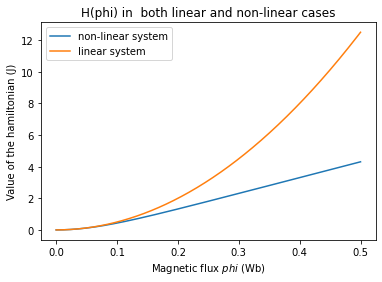

In [66]:
#Comparison of hamiltonian in both cases for phi0 = 0.1
phi = np.linspace(0,0.5,500)
Hphi_nl = E0*np.log(np.cosh(phi/phi0))
Hphi = 0.5*phi**2/L0
plt.plot(phi,Hphi_nl, label='non-linear system')
plt.plot(phi,Hphi, label='linear system')
plt.title('H(phi) in  both linear and non-linear cases')
plt.xlabel('Magnetic flux $phi$ (Wb)')
plt.ylabel('Value of the hamiltonian (J)')
plt.legend()


In [67]:
#Simulation
simulator = QuadraticPhsSolver(Jfunc,Rfunc,L,2,1)
results_nl_sim1 = simulator.simulate(vcontrol, duration, sr, init_state)

In [68]:
#Change of variable to get real state
def X(q):
    x1 = (q[:,0] / np.sqrt(C0))[:,None]
    x2 = (np.sign(q[:,1])*phi0*np.arccosh(np.exp(q[:,1]**2/(2*E0))))[:,None]
    return np.concatenate((x1, x2), axis = 1)

def flow(q):
    f = np.zeros_like(q)
    f[0:-1] = (q[1:]-q[0:-1])*sr
    return f

def computeEfforts(q):
    e1 = (q[:,0] / C0)[:,None]
    e2 = (E0/phi0*np.tanh(q[:,1]/phi0))[:,None]
    return np.concatenate((e1,e2), axis=1)

results_nl_sim1["State"] = X(results_nl_sim1["State"])
results_nl_sim1["Flows"] = flow(results_nl_sim1["State"])
results_nl_sim1["Efforts"] = computeEfforts(results_nl_sim1["State"])

Mean error on power balance = -1.1643519313895598e-17


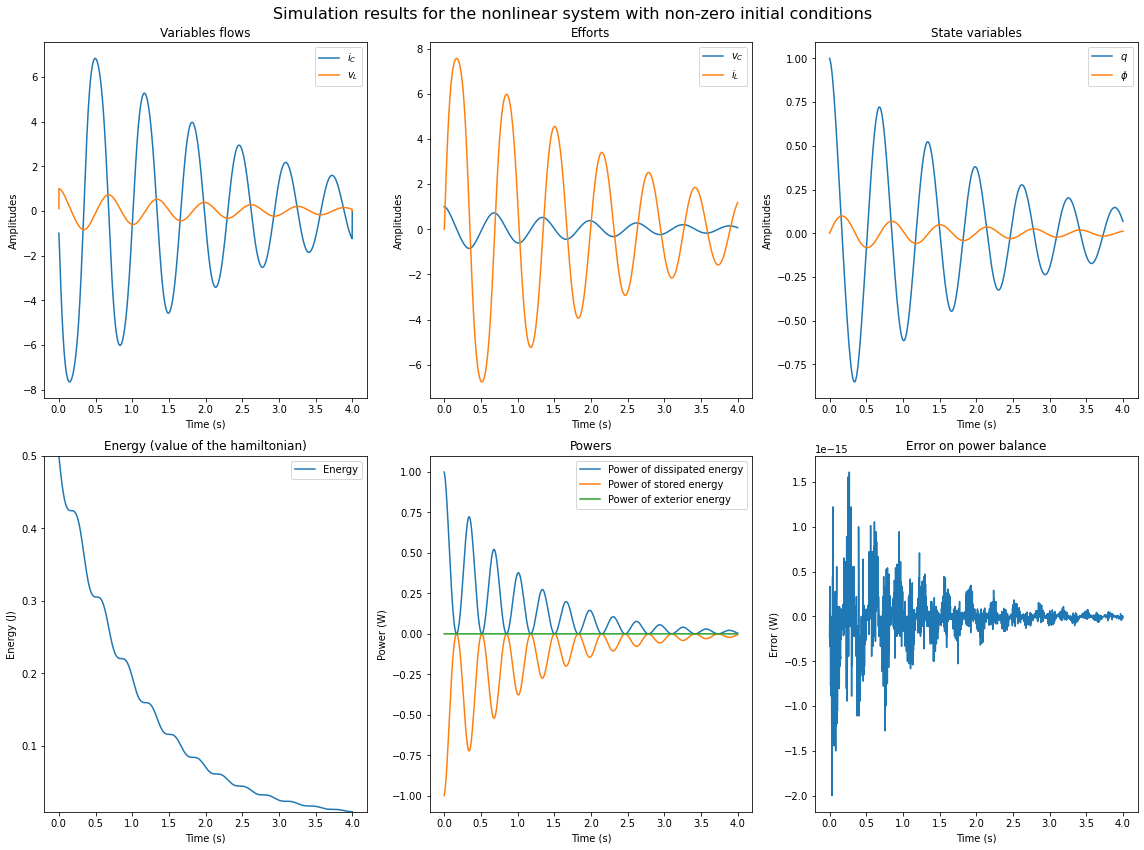

In [69]:
#Plot simulation results
plot_title = "Simulation results for the nonlinear system with non-zero initial conditions"

fig = util.plot_results(results_nl_sim1, plot_title, efforts_labels, flow_labels, state_labels)
#plt.savefig('Results_nl_quad.pdf')

As expected, the method allows to simulate a non-linear system, still preserving passivity up to machine precision.

By changing the value of $\phi _0$ and setting $E_0 = \frac{\phi _0^2}{L_0}$, such that the system resonance frequency is the same that in the linear case, we can observe the effect of the non-linearity on the system. 

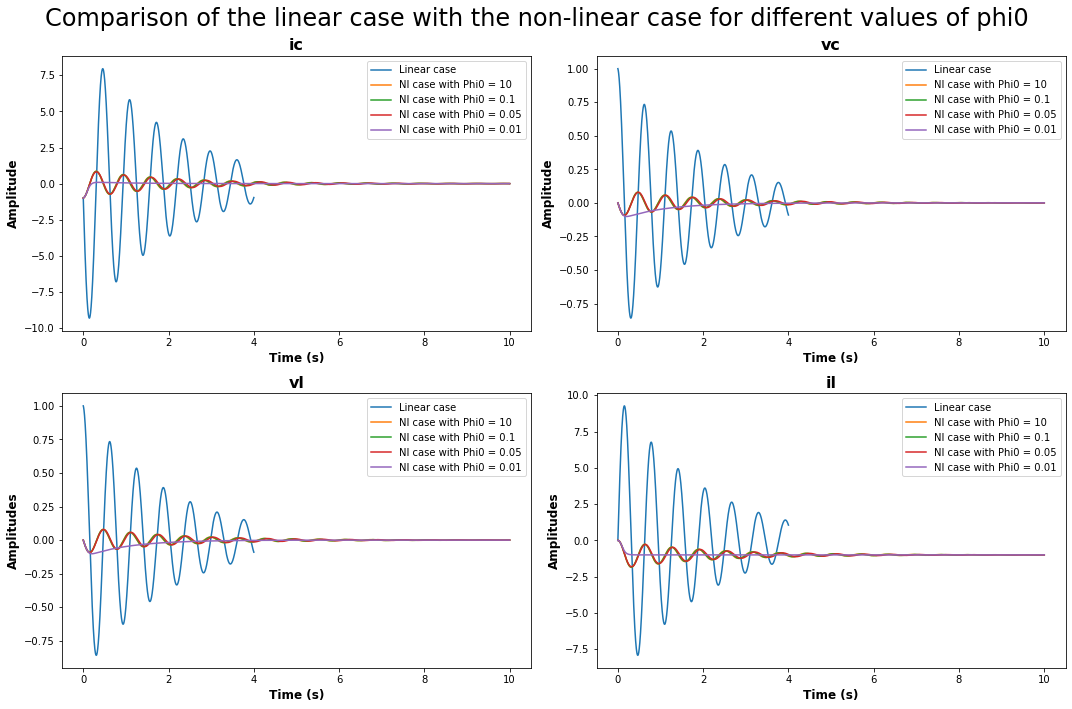

In [72]:
#Comparison with the linear case for different values of phi0
#Computation
phi0s = [10, 0.1, 0.05, 0.01]
all_results = dict()
for phi0 in phi0s:
    E0 = phi0**2/L0

    def Jfunc(q):
        q2 = q[1]
        if q2!=0:
            jacq2 = np.sign(q2) * E0 / phi0 * np.sqrt(1-np.exp(-q2**2/E0))/q2
        else:
            #If q2 = 0, we take the limit of the function at zero, which is 1
            jacq2 = 1
        return jacq2 * np.array([[0, -1, 0], [1, 0, 0], [0, 0, 0]])

    def Rfunc(q):
        return 1/R0 * np.array([[1/C0, 0, 1/sqrtC0], [0, 0, 0], [1/sqrtC0, 0, 1]])

    def computeEfforts(q):
        e1 = (q[:,0] / C0)[:,None]
        e2 = (E0/phi0*np.tanh(q[:,1]/phi0))[:,None]
        return np.concatenate((e1,e2), axis=1)

    simulator = QuadraticPhsSolver(Jfunc, Rfunc, L, 2 ,1)
    all_results[phi0] = simulator.simulate(vcontrol, duration, sr, init_state)

    all_results[phi0]["State"] = X(all_results[phi0]["State"])
    all_results[phi0]["Flows"] = flow(all_results[phi0]["State"]) 
    all_results[phi0]["Efforts"] = computeEfforts(all_results[phi0]["State"]) 



    

#Plotting
plt.figure(figsize=(15, 10))
plt.suptitle("Comparison of the linear case with the non-linear case for different values of phi0",
        fontsize = 24)

plt.subplot(2,2,1)
plt.title("ic", fontweight = 'bold', fontsize = 16)
plt.xlabel('Time (s)', fontweight = 'bold', fontsize = 12)
plt.ylabel('Amplitude', fontweight = 'bold', fontsize = 12)

plt.plot(results_sim1["Time"], results_sim1["Flows"][:,0], label='Linear case')
for phi0 in phi0s:
    plt.plot(all_results[phi0]["Time"], all_results[phi0]["Flows"][:,0], label=f"Nl case with Phi0 = {phi0}")
plt.legend()

plt.subplot(2,2,2)
plt.title("vc", fontweight = 'bold', fontsize = 16)
plt.xlabel('Time (s)', fontweight = 'bold', fontsize = 12)
plt.ylabel('Amplitude', fontweight = 'bold', fontsize = 12)

plt.plot(results_sim1["Time"], results_sim1["Efforts"][:,0], label='Linear case')
for phi0 in phi0s:
    plt.plot(all_results[phi0]["Time"], all_results[phi0]["Efforts"][:,0], label=f"Nl case with Phi0 = {phi0}")
plt.legend()

plt.subplot(2,2,3)
plt.title("vl", fontweight = 'bold', fontsize = 16)
plt.xlabel('Time (s)', fontweight = 'bold', fontsize = 12)
plt.ylabel('Amplitudes', fontweight = 'bold', fontsize = 12)

plt.plot(results_sim1["Time"], results_sim1["Flows"][:,1], label='Linear case')
for phi0 in phi0s:
    plt.plot(all_results[phi0]["Time"], all_results[phi0]["Flows"][:,1], label=f"Nl case with Phi0 = {phi0}")
plt.legend()

plt.subplot(2,2,4)
plt.title("il", fontweight = 'bold', fontsize = 16)
plt.xlabel('Time (s)', fontweight = 'bold', fontsize = 12)
plt.ylabel('Amplitudes', fontweight = 'bold', fontsize = 12)

plt.plot(results_sim1["Time"], results_sim1["Efforts"][:,1], label='Linear case')
for phi0 in phi0s:
    plt.plot(all_results[phi0]["Time"], all_results[phi0]["Efforts"][:,1], label=f"Nl case with Phi0 = {phi0}")
plt.legend()

plt.tight_layout()
    

Mean error on power balance = 1.1102230246251566e-19


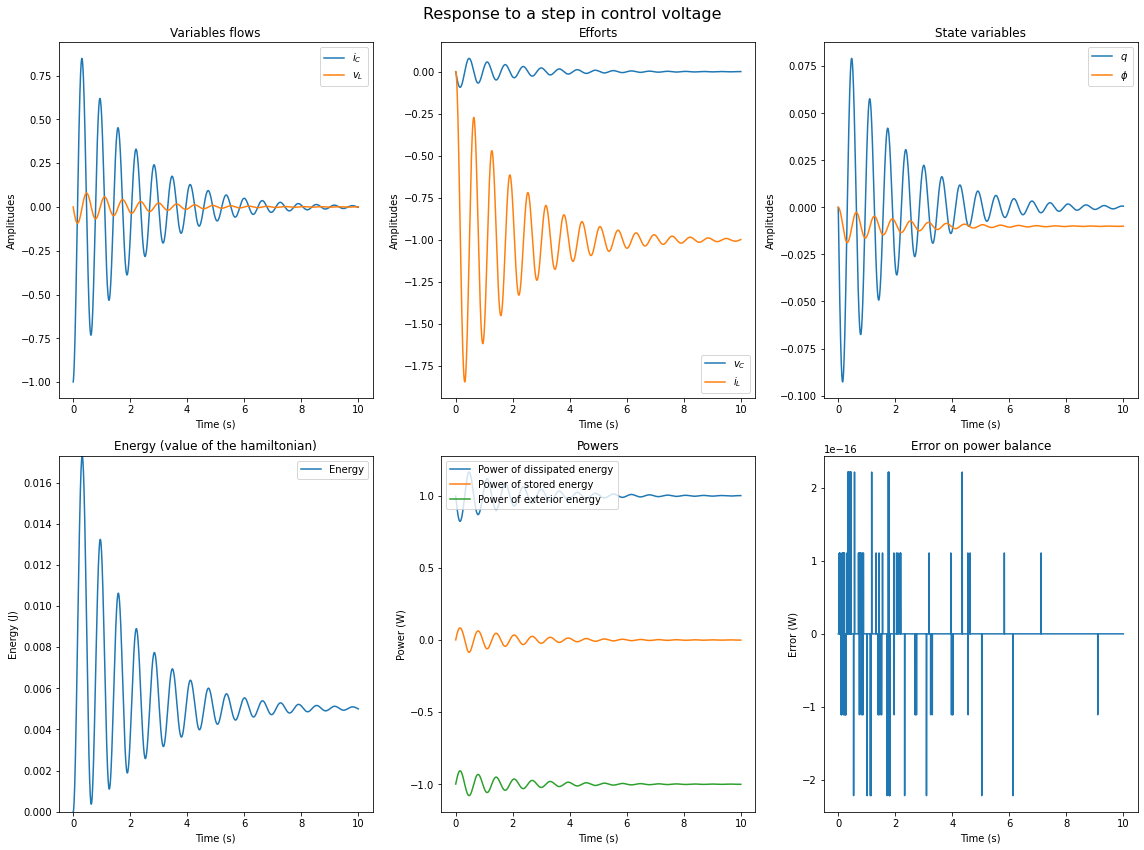

In [73]:
#Response to a step impulse
#control voltage
def vcontrol(t):
    return 1*np.ones_like(t)[:,None,None]

init_state = np.array([0,0])
phi0 = 0.1

E0 = phi0**2/L0

def Jfunc(q):
    q2 = q[1]
    if q2!=0:
        jacq2 = np.sign(q2) * E0 / phi0 * np.sqrt(1-np.exp(-q2**2/E0))/q2
    else:
        #If q2 = 0, we take the limit of the function at zero, which is 1
        jacq2 = 1
    return jacq2 * np.array([[0, -1, 0], [1, 0, 0], [0, 0, 0]])

def Rfunc(q):
    return 1/R0 * np.array([[1/C0, 0, 1/sqrtC0], [0, 0, 0], [1/sqrtC0, 0, 1]])

def computeEfforts(q):
    e1 = (q[:,0] / C0)[:,None]
    e2 = (E0/phi0*np.tanh(q[:,1]/phi0))[:,None]
    return np.concatenate((e1,e2), axis=1)

duration = 10
simulator = QuadraticPhsSolver(Jfunc, Rfunc, L, 2 ,1)
results_sim4 = simulator.simulate(vcontrol, duration, sr, init_state)

results_sim4["State"] = X(results_sim4["State"])
results_sim4["Flows"] = flow(results_sim4["State"]) 
results_sim4["Efforts"] = computeEfforts(results_sim4["State"]) 

fig = util.plot_results(results_sim4, "Response to a step in control voltage",efforts_labels,flow_labels,state_labels)


## <span style="color:red">Exercice 3 (nonlinear circuit) : PHS shifting</span>

### Question 9

An equilibrium state $x^*$ of the system must satisfy $\dot{x}^*=0$. In our case, it means $i_C^* = 0$ and $v_L^* = 0$. 
From Kirchhoff laws, we deduce : $v_C^*=0\Rightarrow v_R^*=v_G^*$ and $i_L^*=i_R^*=i_G^*=\frac{v_G^*}{R_0}$. 

Finally, we can get the state equilibrium by using the expression of $\nabla H(x^*)$:

$v_c^* = 0 = \frac{\partial H(x^*)}{\partial q^*} = \frac{q^*}{C_0}  \Longrightarrow  q^* =  0$

$i_L^* = \frac{v_g^*}{R_0} = \frac{\partial H(x^*)}{\partial \phi^*} = \frac{E_0}{\phi_0}tanh(\frac{\phi^*}{\phi_0})  \Longrightarrow  \phi^* = \phi_0 arctanh(\frac{\phi_0 v_G^*}{E_0 R_0})\quad \text{for} \quad-1 < \frac{\phi_0 v_G^*}{E_0 R_0} < 1$

### Question 10

To get the shifted hamiltonian, we use :

$\tilde{H_{x^*}}(\tilde{x}) = H(\tilde{x} + x^*) - \nabla H(x^*)^T\tilde{x} - H(x^*)$

Computing the different terms gives : 

$H(\tilde{x} + x^*) = E_0 ln(cosh(\frac{\tilde{\phi}}{\phi_0})cosh(\frac{\phi^*}{\phi_0})+sinh(\frac{\tilde{\phi}}{\phi_0})sinh(\frac{\phi^*}{\phi_0})) + (\frac{\tilde{q}^2}{2C_0} + \frac{\tilde{q}q^*}{C_0} + \frac{q^{*^2}}{2C_0} )$

$\nabla H(x^*)^T\tilde{x} = \frac{\tilde{q}q^*}{C_0} + \tilde{\phi} \frac{E_0}{\phi_0}tanh(\frac{\phi^*}{\phi_0})$

$H(x^*) = \frac{q^{*^2}}{2C_0} + E_0 ln(cosh( \frac{\phi^*}{\phi_0} ))$

Finally : 

$\tilde{H_{x^*}}(\tilde{x}) = E_0 ln (cosh(\frac{\tilde{\phi}}{\phi_0})+sinh(\frac{\tilde{\phi}}{\phi_0})tanh(\frac{\phi^*}{\phi_0})) + \frac{\tilde{q}^2}{2C_0} - \tilde{\phi} \frac{E_0}{\phi_0}tanh(\frac{\phi^*}{\phi_0})$

And the gradient : 

$\nabla\tilde{H_{x^*}}(\tilde{x}) = \frac{E_0}{\phi_0} 
(\frac{tanh(\frac{\tilde{\phi}}{\phi_0})+tanh(\frac{\phi^*}{\phi_0})}
{1+tanh(\frac{\tilde{\phi}}{\phi_0})tanh(\frac{\phi^*}{\phi_0})}
)$


Text(0.5, 0, '$\\phi$')

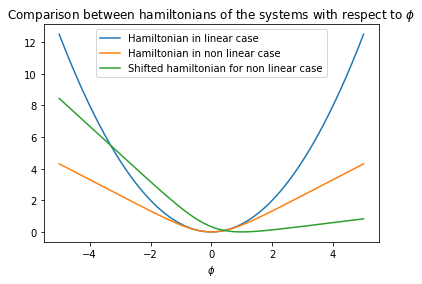

In [74]:
#Comparison between initial hamiltonian and shifted one (for phi)
phi_eq = 1
phi = np.linspace(-5, 5, 500)
phitilde = phi-phi_eq

E0 = 1
phi0 = 1
L0 = phi0**2 / E0

Hlinear = phi**2 / (2*L0)
H = E0 * np.log(np.cosh(phi/phi0))
Hshifted = E0 * np.log(np.cosh(phitilde/phi0) + np.sinh(phitilde/phi0) * np.tanh(phi_eq/phi0)) - phitilde*E0/phi0*np.tanh(phi_eq/phi0)

plt.plot(phi,Hlinear, label='Hamiltonian in linear case')
plt.plot(phi,H, label='Hamiltonian in non linear case')
plt.plot(phi,Hshifted, label='Shifted hamiltonian for non linear case')
plt.legend()
plt.title("Comparison between hamiltonians of the systems with respect to $\phi$")
plt.xlabel('$\phi$')


### Question 11 

As condition (49) of section 4.4 (p.19) is still satisfied with the shifted hamiltonian, we can apply the same procedure as in exercise 2. 

In [75]:
#State variables
q, phi = sp.symbols('q phi', real = True)
state = np.array([q, phi], dtype = object)



#Component parameters
E0, phi0, C0, R0 = sp.symbols('E_0 phi_0 C_0 R_0', real = True, positive = True)

#Bias
vg_eq = sp.symbols('v_G^*', real = True)
phi_eq = sp.symbols('phi^*', real = True)

H = (q**2/(2*C0) + E0*sp.log(sp.cosh(phi/phi0) + sp.sinh(phi/phi0) * sp.tanh(phi_eq/phi0)) - phi*E0/phi0*sp.tanh(phi_eq/phi0))
#H = (q**2/(2*C0) + E0*sp.log(sp.cosh(phi/phi0)))



phsquad = PHSQuadratiser(J,R,state,H)


In [76]:
util.display_quadratization_init(phsquad)

<IPython.core.display.Latex object>

q_+/sqrt(C_0)

sqrt(2)*sqrt(E_0)*sqrt(-phi_+*tanh(phi^*/phi_0) + phi_0*log(sinh(phi_+/phi_0)*tanh(phi^*/phi_0) + cosh(phi_+/phi_0)))/sqrt(phi_0)

<IPython.core.display.Latex object>

Matrix([
[1/sqrt(C_0),                                                                                                                                                                                                                                      0],
[          0, sqrt(2)*sqrt(E_0)*sinh(phi_+/phi_0)/(2*sqrt(phi_0)*sqrt(-phi_+*tanh(phi^*/phi_0) + phi_0*log(sinh(phi_+/phi_0)*tanh(phi^*/phi_0) + cosh(phi_+/phi_0)))*(sinh(phi_+/phi_0)*tanh(phi^*/phi_0) + cosh(phi_+/phi_0))*cosh(phi^*/phi_0)**2)]])

<IPython.core.display.Latex object>

Matrix([
[                                                                                                                                                                                                                                               0, -sqrt(2)*sqrt(E_0)*sinh(phi_+/phi_0)/(2*sqrt(C_0)*sqrt(phi_0)*sqrt(-phi_+*tanh(phi^*/phi_0) + phi_0*log(sinh(phi_+/phi_0)*tanh(phi^*/phi_0) + cosh(phi_+/phi_0)))*(sinh(phi_+/phi_0)*tanh(phi^*/phi_0) + cosh(phi_+/phi_0))*cosh(phi^*/phi_0)**2), 0],
[sqrt(2)*sqrt(E_0)*sinh(phi_+/phi_0)/(2*sqrt(C_0)*sqrt(phi_0)*sqrt(-phi_+*tanh(phi^*/phi_0) + phi_0*log(sinh(phi_+/phi_0)*tanh(phi^*/phi_0) + cosh(phi_+/phi_0)))*(sinh(phi_+/phi_0)*tanh(phi^*/phi_0) + cosh(phi_+/phi_0))*cosh(phi^*/phi_0)**2),                                                                                                                                                                                                                                                 0, 0],
[          

<IPython.core.display.Latex object>

Matrix([
[      1.0/C_0, 0, 1.0/sqrt(C_0)],
[            0, 0,             0],
[1.0/sqrt(C_0), 0,           1.0]])

<IPython.core.display.Latex object>

Matrix([
[                                                                                                                                                                                                                                        -1.0/C_0, -sqrt(2)*sqrt(E_0)*sinh(phi_+/phi_0)/(2*sqrt(C_0)*sqrt(phi_0)*sqrt(-phi_+*tanh(phi^*/phi_0) + phi_0*log(sinh(phi_+/phi_0)*tanh(phi^*/phi_0) + cosh(phi_+/phi_0)))*(sinh(phi_+/phi_0)*tanh(phi^*/phi_0) + cosh(phi_+/phi_0))*cosh(phi^*/phi_0)**2), -1.0/sqrt(C_0)],
[sqrt(2)*sqrt(E_0)*sinh(phi_+/phi_0)/(2*sqrt(C_0)*sqrt(phi_0)*sqrt(-phi_+*tanh(phi^*/phi_0) + phi_0*log(sinh(phi_+/phi_0)*tanh(phi^*/phi_0) + cosh(phi_+/phi_0)))*(sinh(phi_+/phi_0)*tanh(phi^*/phi_0) + cosh(phi_+/phi_0))*cosh(phi^*/phi_0)**2),                                                                                                                                                                                                                                                 0,   

To continue, we would have to derive or implement the inverse function $X(q)$.